# How to train your Keypoint Moseq Model:
Ok... so you are going to have to bare with me because this tutorial involves ***a lot*** of jumping back and forth. 

## There are a few steps to training the Keypoint Moseq Model:
### **1. Calibration and PCA (JupyterLab)**
- Essentially you have to set it up so the Keypoint Moseq model can know how accurate the SLEAP model is
- The calibration part is interactive you will have to do that in Jupyterlab
- You will also set up your kappa for step **2. Fitting AR-HMM Model**, which is just the distribution of syllable lengths. Higher kappa, longer syllables. 
### **2. Fitting AR-HMM Model (notebook or Python Script on HPC)**
- AR-HMM: Autoreggressive Hidden Markov Model (no, I don't know what that is)
- This step can also take awhile so you can also run this model fitting as a script on the HPC. I include it in the notebook because when I tried it in a notebook, it didn't crash my kernel like step **3. Fitting a Full Model** did and for me, it's easier to keep track of the order of things in a Jupyter Notebook.
### **3. Fitting a Full Model (Python Script on HPC)**
- This is the Jupyter kernel killer step so you have to run it as a script on the HPC. I will include the name and order of which scripts to run once you get to this point in the notebook. Don't worry, Mommy is going to hold your hand.

#### First you need to import your Keypoint Moseq package:
Since you need to do step **1. Calibration and PCA** in JupyterLab anyways you might as well start running this code there. To open Ju

In [12]:
import keypoint_moseq as kpms
import os

#### and also set up filepaths:

In [13]:
sleap_model_path = 'C:/Users/Steve/Desktop/Karin/tutorials/240709_092906.multi_instance.n=1301/' #CHANGE HERE where is your SLEAP model?
project_dir = r'Y:\Karin\tutorialmaking\newkatiesvideomodeling' #CHANGE HERE
video_dir = os.path.join(project_dir, 'videos')
data_dir = video_dir

#### aaand set up your config

In [4]:
config = lambda: kpms.load_config(project_dir)

In [5]:
bodyparts=[
'nose',
'earL',
'earR',
'head',
'centroid',
'tailBase',
'tailEnd',
'upperBack',
'lowerBack',
'lateralL',
'lateralR',]

skeleton=[
    ['nose', 'earL'],
    ['nose', 'earR'],
    ['nose', 'head'],
    ['nose', 'lateralL'],
    ['nose', 'lateralR'],
    ['head', 'upperBack'],
    ['upperBack', 'lowerBack'],
    ['lowerBack', 'tailBase'],
    ['tailBase', 'tailEnd']
    ]
kpms.setup_project(
    project_dir,
    video_dir=video_dir,
    bodyparts=bodyparts,
    skeleton=skeleton,
    overwrite=True)

In [6]:
kpms.update_config(
    project_dir,
    video_dir=video_dir,
    anterior_bodyparts=['nose'],
    posterior_bodyparts=['tailBase'],
    use_bodyparts=[
   'nose','earL', 'earR','head','centroid','tailBase','upperBack','lowerBack'])

#### Now load your coordinate data.
I wrote this code so it will open .h5 files, though you can change the code so it can use .slp data. If you want to use DeepLabCuts output, you will have to change the code also, but I don't feel like going in to instructions for DeepLabCuts-Keypoint Moseq work so just look at the [Keypoint Moseq Colab notebook](https://colab.research.google.com/github/dattalab/keypoint-moseq/blob/main/docs/keypoint_moseq_colab.ipynb) from the developers for reference if you really want (also you can look for reference if you want to get rid of the "only being able to use .h5 files" part of my code)

In [7]:
# Ensure 'videos' directory within data_dir
keypoint_data_path = os.path.join(project_dir, 'videos')

# Load only files ending with .h5
h5_files = [f for f in os.listdir(keypoint_data_path) if f.endswith('.h5')]

# Assuming kpms.load_keypoints and kpms.format_data are functions provided by a library
coordinates, confidences, bodyparts = kpms.load_keypoints([os.path.join(keypoint_data_path, f) for f in h5_files], 'sleap')

# format data for modeling
data, metadata = kpms.format_data(coordinates, confidences, **config())

Loading keypoints: 100%|████████████████| 55/55 [00:01<00:00, 45.44it/s]
c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\util.py:836: UserWarning:


Coordinates for the following bodyparts are missing (set to NaN) in at least 50.0% of frames:
 - tailEnd



c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\util.py:842: UserWarning:

This may cause problems during modeling. See https://keypoint-moseq.readthedocs.io/en/latest/FAQs.html#high-proportion-of-nans for additional information.



# 1. Calibration and PCA (JupyterLab)
So you should be in JupyterLab, if you are not, open this notebook in JupyterLab. You need JupyterLab to calibrate the SLEAP model with Keypoint Moseq interactively.
So taken directly from the [Keypoint Moseq Colab notebook](https://colab.research.google.com/github/dattalab/keypoint-moseq/blob/main/docs/keypoint_moseq_colab.ipynb) from the developers, here are the calibration instructions:

##### Run the cell below. A widget should appear with a video frame on the left.
##### Annotate each frame with the correct location of the labeled bodypart
- ##### Left click to specify the correct location - an “X” should appear.
- ##### Use the arrow buttons to annotate additional frames.
- ##### Each annotation adds a point to the right-hand scatter plot.
- ##### Continue until the regression line stabilizes.
##### At any point, adjust the confidence threshold by clicking on the scatter plot.
##### Use the “save” button to update the config and store your annotations to disk.

Loading sample frames: 100%|████████████| 92/92 [00:06<00:00, 14.62it/s]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
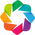

ModuleNotFoundError: No module named 'jupyter_bokeh'

Column
    [0] Row
        [0] Button(align='center', name='◀', width=50)
        [1] Button(align='center', name='▶', width=50)
        [2] Spacer(width=50)
        [3] Button(align='center', name='Save', width=100)
        [4] Spacer(width=50)
        [5] StaticText(align='center', value='slope: -0.500000<br>inter...)
    [1] Row
        [0] HoloViews(DynamicMap)
        [1] HoloViews(DynamicMap)

In [8]:
kpms.noise_calibration(project_dir, coordinates, confidences, **config())

#### Fit the PCA
You will also have to fit a PCA to your calibration data:

>=90.0% of variance exlained by 2 components.


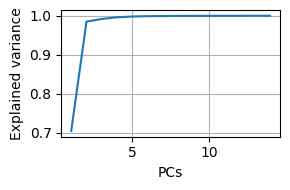

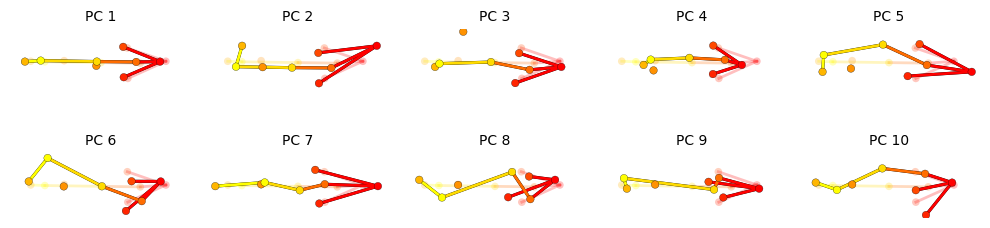

In [9]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())


##### Change your ```latent_dim``` to however many dimensions are needed to explain 90% of the variance (take from previous cell output) or 10 dimensions, whichever is lower:

In [10]:
kpms.update_config(project_dir, latent_dim=2) #CHANGE HERE

# 2. Fitting AR-HMM Model (notebook or Python Script on HPC)
This step can take a while so it may be better to run the `arhmmfit.py` script from the repository on the HPC. This will save a model and in the future, you will use the name of the folder (which should be named a date like `2024_07_12-11_12_32` for example) as the `kpmsmodel_name`

#### Set up initialize the model and set up `kappa` hyperparameter for the AR-HMM
You want to set your kappa to the point where your median syllable durations are about 12 frames. This can take some adjusting.

In [ ]:
# use the following to load an already fit model
# pca = kpms.load_pca(project_dir)

# initialize the model
model = kpms.init_model(data, pca=pca, **config())

# optionally modify kappa
model = kpms.update_hypparams(model, kappa=1e7) #CHANGE HERE

#### Fit your AR-HMM model

In [ ]:
num_ar_iters = 50

model, kpmsmodel_name = kpms.fit_model(
    model, data, metadata, project_dir,
    ar_only=True, num_iters=num_ar_iters)

# 3. Fitting a Full Model (Python Script on HPC)

You will have to use the `kpmsmodelfit.py` and `kpmsreindexandsave.py` scripts in order to fit a full model. In this script, you can just fill in the filepaths and you should be good. To run this script you must have HPC access. You have to change the `.py` file in `sample-job.sh` to whichever script you need to run and i ran the script by submiting a job with `sample-job.sh` on to the HPC. You might need to write your own `sample-job.sh` file. This may take some troubleshooting. 

The `kpmsmodelfit.py` will fit your full Keypoint Moseq model and `kpmsreindexandsave.py` will reindex your syllables by frequency and save them as `results.h5`. You can also adjust the `kappa` for the full model so the median syllable duration is 12 frames. The full model will likely need a lower `kappa`.  


#### Once you have a Keypoint Moseq Model you can check here to see what the median frame durations are for every 25 iterations, just put the foldername of the keypoint moseq model of interest in the next cell.

In [15]:
kpmsmodel_name = 'my_kappa_scanfull550-100.0' #CHANGE HERE

import os
import keypoint_moseq as kpms
import h5py
import numpy as np

checkpoint_path = os.path.join(project_dir, kpmsmodel_name, "checkpoint" + ".h5")

with h5py.File(checkpoint_path, "r") as f:
    saved_iterations = np.sort([int(i) for i in f["model_snapshots"]])
    mask = f["data/mask"][()]

median_durations = []
for i in saved_iterations:
    with h5py.File(checkpoint_path, "r") as f:
        z = np.array(f[f"model_snapshots/{i}/states/z"])
        median_durations.append(np.median(kpms.get_durations(z, mask)))

print(median_durations)

[230.0, 3.0, 3.0, 5.0, 5.0, 5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 8.0, 9.0, 10.0, 10.0, 9.0, 9.0, 11.0, 13.0, 12.0, 13.0, 13.0, 14.0]
